
# Análisis de residencias profesionales en carreras afines a tecnologías de información en el ITD

De acuerdo al manual de lineamientos académico-administrativos del Tecnológico Nacional de México, define la residencia profesional como una estrategia educativa con carácter curricular, que permite al estudiante emprender un proyecto de tipo teórico-práctico, analítico, reflexivo, crítico y profesional; cuyo propósito es el de resolver un problema para fortalecer y aplicar sus competencias profesionales (TecNM, 2015). Las prácticas pueden realizarse de manera individual, grupal o interdisciplinario, dependiendo de las condiciones y alcance del proyecto de la empresa o institución. La residencia tiene un valor curricular de 10 créditos y deben de cumplir 500 horas en un tiempo mínimo de cuatro meses a un máximo de seis meses.

## Metodología:
El presente estudio se desarrolló bajo un enfoque cuantitativo, que tal como lo señala Briones (2002) se utiliza información cuantificable para describir o tratar de explicar los fenómenos que se estudian. El diseño de la investigación es no experimental y de tipo transversal que de acuerdo con Hernández, Fernández, y Baptista (2010) se utilizan para describir y analizar variables en un momento dado, y de tipo descriptivo para establecer la forma de distribución de una o más variables en el ámbito del colectivo como lo señala Briones (2002).
La técnica de recolección de datos consistió en el análisis de documentos oficiales y como instrumento, se utilizó una guía de observación estructurada con preguntas de tipo nominal con opciones múltiples que se llenó a partir de la información observada en el formato ITD-AC-PO-3-1 Rev.1 y del anteproyecto de residencia. Se realizó un censo con todos los proyectos registrados durante el periodo enero-junio 2018, agosto-diciembre 2018, enero-junio 2019 y agosto-diciembre 2019

### Referencias
Briones, G. (2002). Metodología de la Investigacion Cuantitativa en las Ciencias Sociales. ARFO editores e impresores Ltda.

TecNM, Tecnológico Nacional de México (2015). Manual de Lineamientos Académico-Administrativos del Tecnológico Nacional de México. Ciudad de México, México: Tecnológico Nacional de México.

Hernández Sampieri, R., Fernández Collado, C., & Baptista Lucio, M. (2010). Metodología de la Investigación. McGraw-Hill.


## Librerias utilizadas y dataframe con los datos de residencias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Librerias para nube e palabras
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings 
warnings.filterwarnings('ignore')

## Al dataframe se le agrego una columna llamada total para ahi desplegar
## los resultados de la funcion count en la agregación de datos
#data = pd.read_csv("C://temp/FormularioResidenciasAGO-DIC-2018.csv", encoding="ANSI")
data = pd.read_csv("C://temp/FormularioResidencias.csv", encoding="UTF-8")


In [2]:
# Obtener Cantidad de registros (observaciones) y variables
print(data.shape)

(237, 20)


In [3]:
# cantdad de registros u observaciones
len(data.index)

237

In [4]:
# Mostrar los 2 primeros registros del dataframe para verificar la estructura e información
data.head(2)

,NombreResidente,Genero,Carrera,PeriodoResidencia,Revisor,NombreProyecto,EmpresaInstitucion,Objetivo,Sector,OrigenProyecto,AlcanceProyecto,Region,Estado,AreaAplicacionConocimiento,AlumnosAsignados,LenguajesProgramacion,BasesDatos,EntornoDesarrollo,FrameworksDesarrollo,Total
0,Karen Gisela Valdez Betancourt,Femenino,Ingenieria en Sistemas Computacionales,Enero-Junio 2018,Deysi Berenice Castañeda Parra,Sistema Administrativo para el Registro y cont...,D´tristan uniformes industriales,Crear un sistema que sea de ayuda y apoyo para...,Privado,Iniciativa propia (propuesta del alumno),Desarrollo nuevo desde cero,Local,Durango,Sistema de escritorio,1,Java,MySQL,Netbeans,No aplica,1
1,Edgar Iván Saucedo Rojas,Masculino,Ingenieria en Sistemas Computacionales,Enero-Junio 2018,Rafael Martínez Saavedra,Desarrollo de Sistema para Control Financiero ...,Alta Seguridad,Desarrollar un sistema capaz de almacenar info...,Privado,Iniciativa propia (propuesta del alumno),Desarrollo nuevo desde cero,Local,Durango,Sistema de escritorio,1,Java,MySQL,Netbeans,No aplica,1


In [5]:
# MOstrar los nombres de Carreras 
data['Carrera'].unique()

array(['Ingenieria en Sistemas Computacionales',
       'Ingenieria en Tecnologías de la Información y Comunicaciones',
       'Ingenieria Informatica'], dtype=object)

In [6]:
## Seleccionar algunas columnas
data2 = data.iloc[ : , [0,4,5,6,7,12 ] ]

data2.head(2)

,NombreResidente,Revisor,NombreProyecto,EmpresaInstitucion,Objetivo,Estado
0,Karen Gisela Valdez Betancourt,Deysi Berenice Castañeda Parra,Sistema Administrativo para el Registro y cont...,D´tristan uniformes industriales,Crear un sistema que sea de ayuda y apoyo para...,Durango
1,Edgar Iván Saucedo Rojas,Rafael Martínez Saavedra,Desarrollo de Sistema para Control Financiero ...,Alta Seguridad,Desarrollar un sistema capaz de almacenar info...,Durango


## Número de alumnos por género por las tres carreras

In [7]:
data['Genero'].value_counts()

Masculino    165
Femenino      72
Name: Genero, dtype: int64

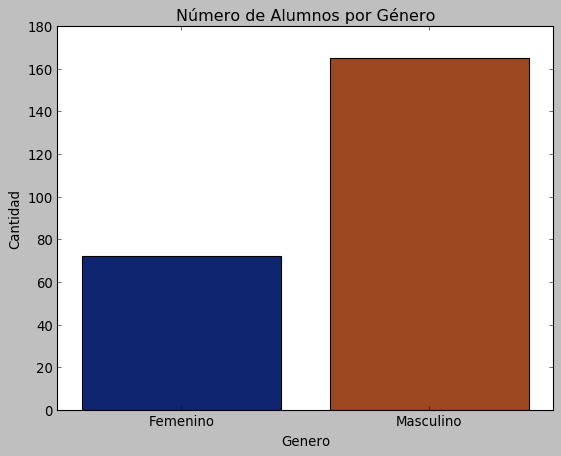

In [8]:
import seaborn as sns
# https://seaborn.pydata.org/generated/seaborn.countplot.html 

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('_classic_test')
sns.countplot(data['Genero'], palette = 'dark')
plt.title('Número de Alumnos por Género', fontweight = 30)
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.show()

## Numero de alumnos por carrera
Para obtener numero de alumnos por carrera se puede obtener de 4 formas ( o más):
* Con la funcion  **value_counts()**
* Con la funcion **group by** pero el resultado se refleja en todas las columnas
* El segundo metodo lo podemos simplificar creando un dataframe con 2 columnas para que el resultado se muestre en la segunda columna
* El tercero es crear un dataframe a partir del original con 2 columnas
* El cuarto es simplemente indicar en que columna se mostrara el resultado omitiendo las demás columnas

In [9]:
# METODO 1
data['Carrera'].value_counts()

Ingenieria en Sistemas Computacionales                          152
Ingenieria Informatica                                           50
Ingenieria en Tecnologías de la Información y Comunicaciones     35
Name: Carrera, dtype: int64

In [10]:
# METODO 2, 
# Agrupando y contando --- el resultado lo muestra en todas las columnas del dataframe
data.groupby('Carrera').count()

,NombreResidente,Genero,PeriodoResidencia,Revisor,NombreProyecto,EmpresaInstitucion,Objetivo,Sector,OrigenProyecto,AlcanceProyecto,Region,Estado,AreaAplicacionConocimiento,AlumnosAsignados,LenguajesProgramacion,BasesDatos,EntornoDesarrollo,FrameworksDesarrollo,Total
Carrera,,,,,,,,,,,,,,,,,,,
Ingenieria Informatica,50,50,50,50,50,50,48,50,50,50,50,50,50,50,50,50,50,50,50
Ingenieria en Sistemas Computacionales,152,152,152,152,152,152,146,152,152,152,152,152,152,152,152,152,152,152,152
Ingenieria en Tecnologías de la Información y Comunicaciones,35,35,35,35,35,35,33,35,35,35,35,35,35,35,35,35,35,35,35


In [11]:
# METODO 3    Creamos un segundo daaframe con las carreras y seleccionamos 
# cualquier otra columna para mostrar ahi el resultado 
# En este ejmplo se seleccionan todos los renglones y columnas 2 y 7
Carreras = data.iloc[ : , [ 2,5] ]
Carreras.head(3)

,Carrera,NombreProyecto
0,Ingenieria en Sistemas Computacionales,Sistema Administrativo para el Registro y cont...
1,Ingenieria en Sistemas Computacionales,Desarrollo de Sistema para Control Financiero ...
2,Ingenieria en Sistemas Computacionales,Aplicación Móvil para Registrar visitas a clie...


In [12]:
# Ahora si calculamos el numero de alumnos por carrera y lo mostramos 
# en la columan del objetivo 
Carreras.groupby('Carrera').count().sort_values(['NombreProyecto'], ascending=False)


,NombreProyecto
Carrera,
Ingenieria en Sistemas Computacionales,152
Ingenieria Informatica,50
Ingenieria en Tecnologías de la Información y Comunicaciones,35


In [13]:
# METODO 4 EL MAS DIRECTO
# Agrupamos por carrera y despues del count indicamos la columna donde queremos mostrar el resultado
data.groupby('Carrera').count()[['Total']].sort_values(['Total'], ascending=False)

,Total
Carrera,
Ingenieria en Sistemas Computacionales,152
Ingenieria Informatica,50
Ingenieria en Tecnologías de la Información y Comunicaciones,35


## Graficar Alumnos por carrera

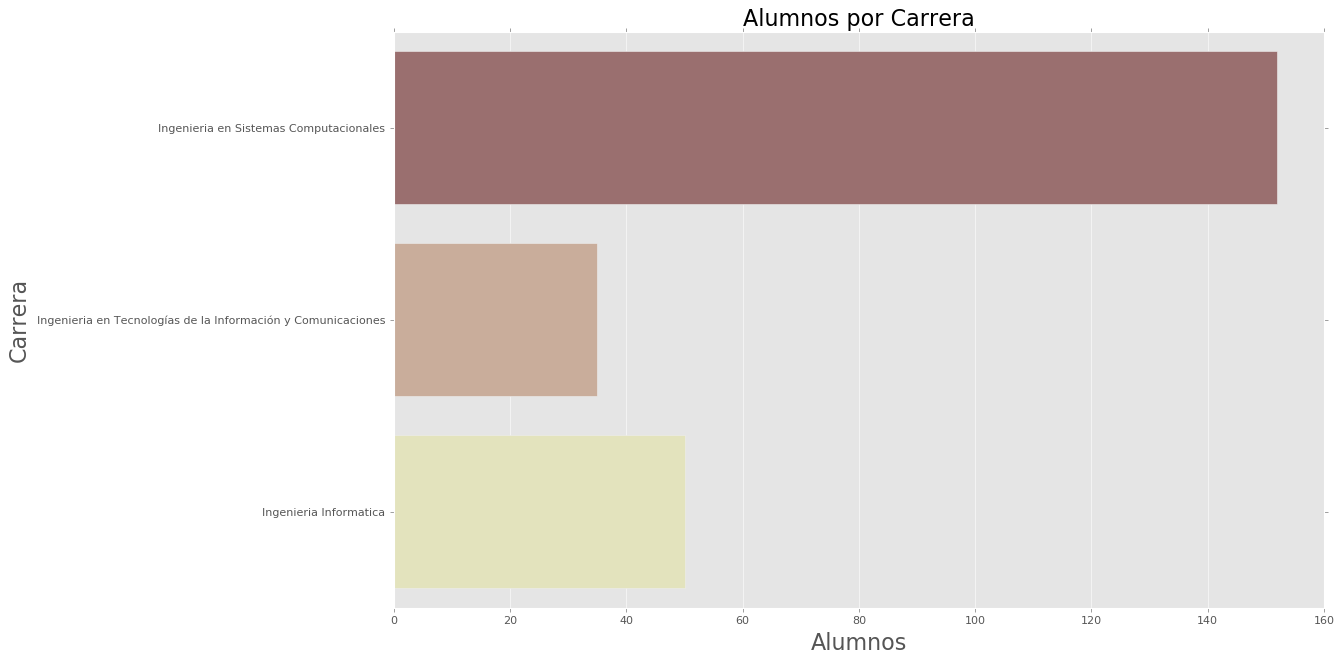

In [14]:
# visualizar los diferentes grupos en el dataset

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

# Barra vertical
# sns.countplot(data['Carrera'], palette = 'pink')

# Barra horizontal
sns.countplot(y=data['Carrera'], palette = 'pink')
plt.title('Alumnos por Carrera', fontweight = 30, fontsize = 20)
plt.xlabel('Alumnos', fontsize = 20)
plt.ylabel('Carrera', fontsize = 20)
plt.show()

## Número de alumnos por carrera y género
Al calcular numero de

In [15]:
##  Agrupamos por carrera y enseguida por genero y contabilizamos
data.groupby(['Carrera', 'Genero']).count()[['Total']]

Total
Carrera                                            Genero          
Ingenieria Informatica                             Femenino      14
                                                   Masculino     36
Ingenieria en Sistemas Computacionales             Femenino      41
                                                   Masculino    111
Ingenieria en Tecnologías de la Información y C... Femenino      17
                                                   Masculino     18

### Graficar número de alumnos por carrera y género 

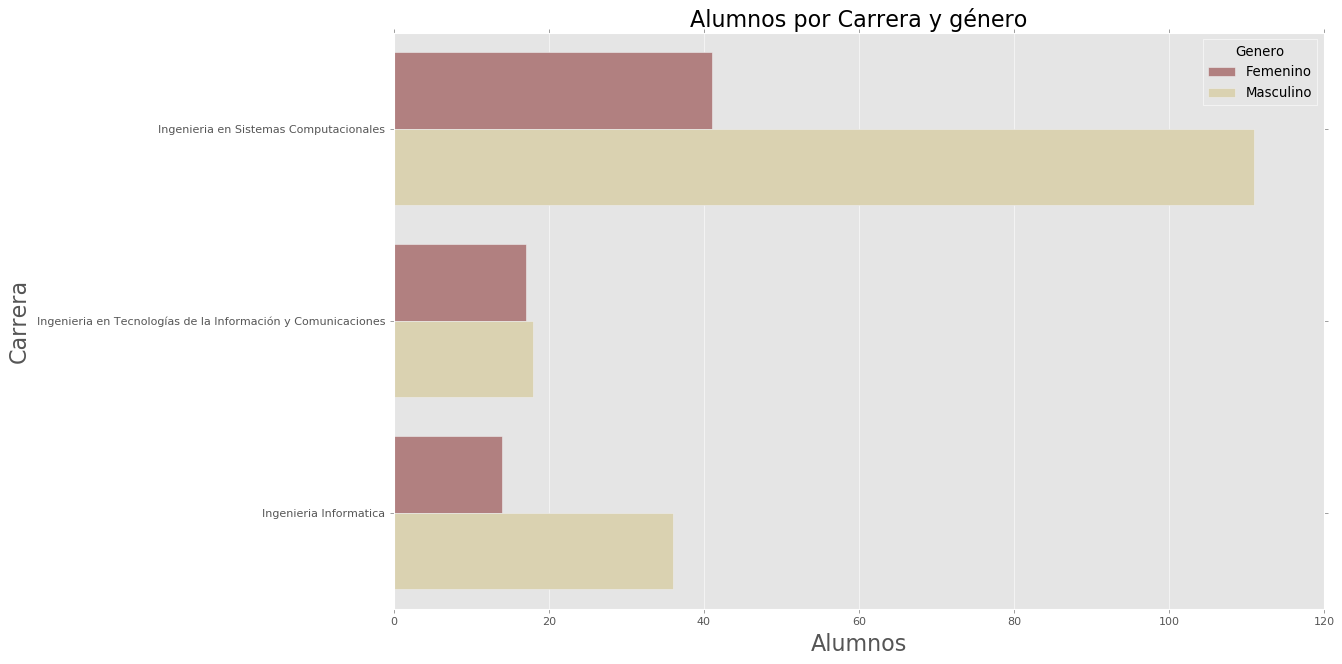

In [16]:
# visualizar los diferentes grupos en el dataset

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

# Barra vertical
# sns.countplot(data['Carrera'], palette = 'pink')

# Barra horizontal
sns.countplot(y=data['Carrera'], hue=data['Genero'], palette = 'pink')

plt.title('Alumnos por Carrera y género', fontweight = 30, fontsize = 20)
plt.xlabel('Alumnos', fontsize = 20)
plt.ylabel('Carrera', fontsize = 20)
plt.show()

## Residencias por periodo

In [17]:
data.groupby(['PeriodoResidencia']).count()[['Total']]

,Total
PeriodoResidencia,
Agosto-Diciembre 2018,53
Agosto-Diciembre 2019,60
Enero-Junio 2018,59
Enero-Junio 2019,65


### Residencias por periodo y Carrera

In [18]:
data.groupby(['PeriodoResidencia','Carrera']).count()[['Total']]

Total
PeriodoResidencia     Carrera                                                  
Agosto-Diciembre 2018 Ingenieria Informatica                                 13
                      Ingenieria en Sistemas Computacionales                 29
                      Ingenieria en Tecnologías de la Información y C...     11
Agosto-Diciembre 2019 Ingenieria Informatica                                  7
                      Ingenieria en Sistemas Computacionales                 45
                      Ingenieria en Tecnologías de la Información y C...      8
Enero-Junio 2018      Ingenieria Informatica                                 15
                      Ingenieria en Sistemas Computacionales                 34
                      Ingenieria en Tecnologías de la Información y C...     10
Enero-Junio 2019      Ingenieria Informatica                                 15
                      Ingenieria en Sistemas Computacionales                 44
                      Ingenieria en Tecnologías de la Información y C...      6

## Gráficas de comparasión

### Crear dataframe con numero de alumnos por carrera y por periodo

In [19]:
##    sin usar UNSTACK

test5 = data.groupby(['PeriodoResidencia', 'Carrera'])['PeriodoResidencia'].count()
test5

PeriodoResidencia      Carrera                                                     
Agosto-Diciembre 2018  Ingenieria Informatica                                          13
                       Ingenieria en Sistemas Computacionales                          29
                       Ingenieria en Tecnologías de la Información y Comunicaciones    11
Agosto-Diciembre 2019  Ingenieria Informatica                                           7
                       Ingenieria en Sistemas Computacionales                          45
                       Ingenieria en Tecnologías de la Información y Comunicaciones     8
Enero-Junio 2018       Ingenieria Informatica                                          15
                       Ingenieria en Sistemas Computacionales                          34
                       Ingenieria en Tecnologías de la Información y Comunicaciones    10
Enero-Junio 2019       Ingenieria Informatica                                          15
                

In [20]:
##   USANDO UNSTACK

test5 = data.groupby(['PeriodoResidencia', 'Carrera'])['PeriodoResidencia'].count().unstack('PeriodoResidencia')
test5


PeriodoResidencia,Agosto-Diciembre 2018,Agosto-Diciembre 2019,Enero-Junio 2018,Enero-Junio 2019
Carrera,,,,
Ingenieria Informatica,13,7,15,15
Ingenieria en Sistemas Computacionales,29,45,34,44
Ingenieria en Tecnologías de la Información y Comunicaciones,11,8,10,6


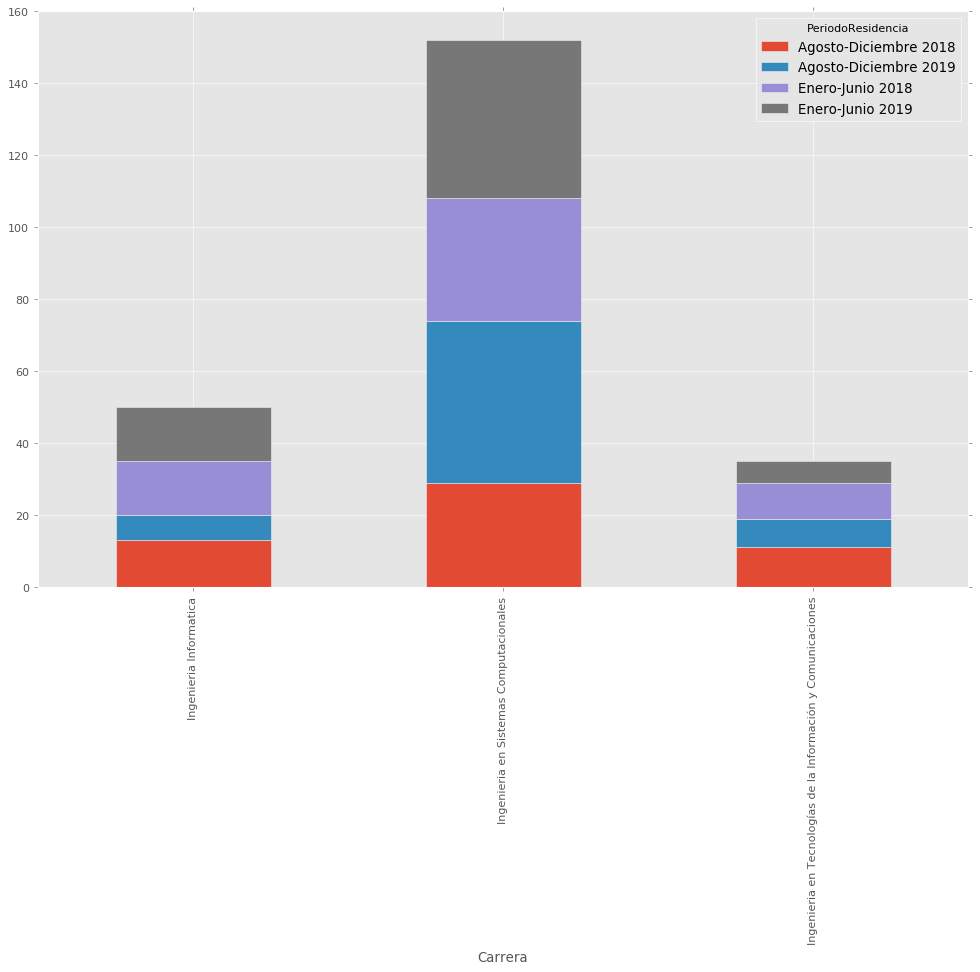

In [21]:
test5.plot(kind='bar', stacked=True)

In [22]:
##   USANDO UNSTACK  

test5 = data.groupby(['Carrera', 'PeriodoResidencia'])['Carrera'].count().unstack('Carrera')
test5

Carrera,Ingenieria Informatica,Ingenieria en Sistemas Computacionales,Ingenieria en Tecnologías de la Información y Comunicaciones
PeriodoResidencia,,,
Agosto-Diciembre 2018,13,29,11
Agosto-Diciembre 2019,7,45,8
Enero-Junio 2018,15,34,10
Enero-Junio 2019,15,44,6


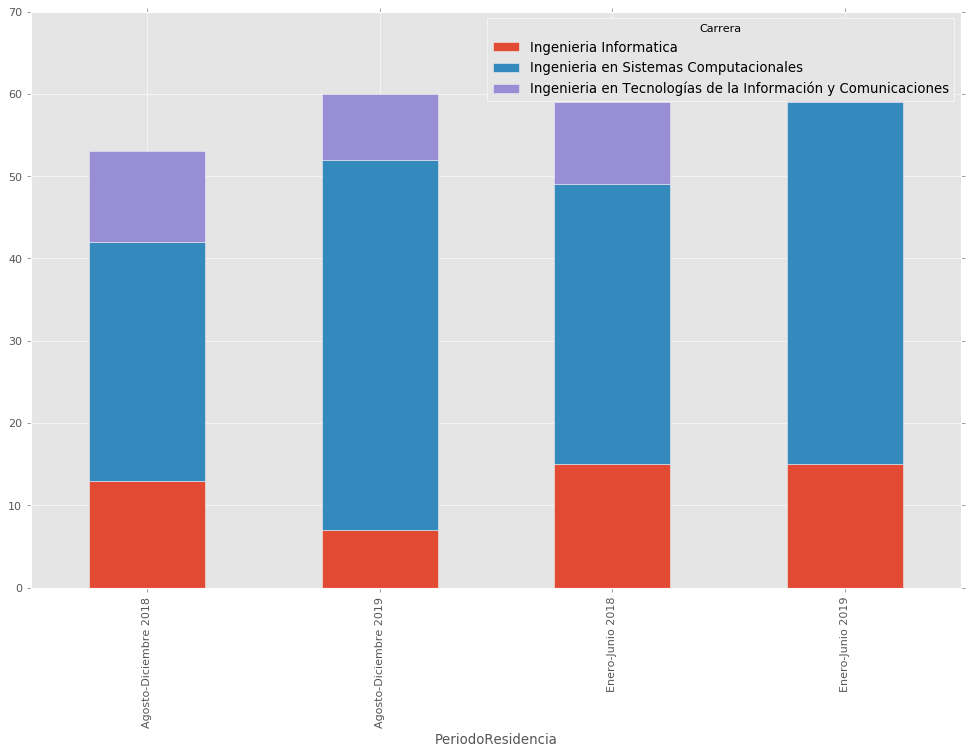

In [23]:
test5.plot(kind='bar', stacked=True)

## Residencias por periodo, carrera y género

In [24]:
data.groupby(['PeriodoResidencia','Carrera', 'Genero']).count()[['Total']]

Total
PeriodoResidencia     Carrera                                            Genero          
Agosto-Diciembre 2018 Ingenieria Informatica                             Femenino       2
                                                                         Masculino     11
                      Ingenieria en Sistemas Computacionales             Femenino       9
                                                                         Masculino     20
                      Ingenieria en Tecnologías de la Información y C... Femenino       4
                                                                         Masculino      7
Agosto-Diciembre 2019 Ingenieria Informatica                             Femenino       1
                                                                         Masculino      6
                      Ingenieria en Sistemas Computacionales             Femenino      12
                                                                         Masculino     33
                      Ingenieria en Tecnologías de la Información y C... Femenino       2
                                                                         Masculino      6
Enero-Junio 2018      Ingenieria Informatica                             Femenino       4
                                                                         Masculino     11
                      Ingenieria en Sistemas Computacionales             Femenino      11
                                                                         Masculino     23
                      Ingenieria en Tecnologías de la Información y C... Femenino       7
                                                                         Masculino      3
Enero-Junio 2019      Ingenieria Informatica                             Femenino       7
                                                                         Masculino      8
                      Ingenieria en Sistemas Computacionales             Femenino       9
                                                                         Masculino     35
                      Ingenieria en Tecnologías de la Información y C... Femenino       4
                                                                         Masculino      2

## Residencias por sector

In [25]:
# Obtener numero de residencias por Total 
data.groupby('Sector').count()[['Total']]

# 127 / 237 = 54%
# 110 / 237 = 46%

,Total
Sector,
Privado,127
Publico,110


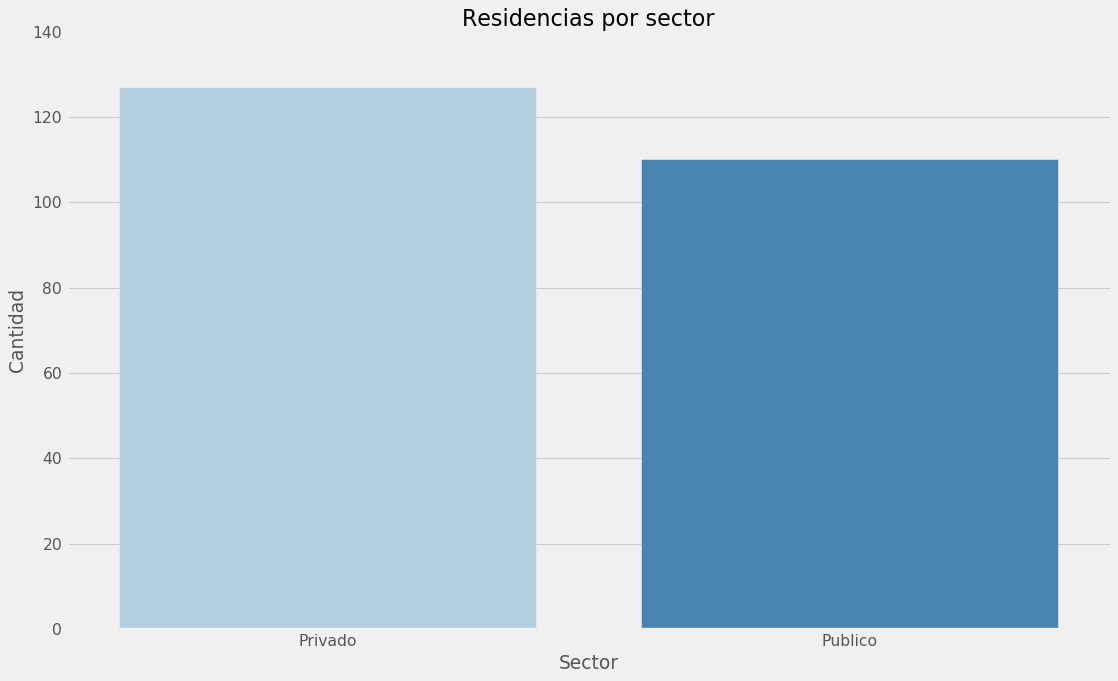

In [26]:
# visualizing the differnt parental education levels

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['Sector'], palette = 'Blues')
plt.title('Residencias por sector', fontweight = 30, fontsize = 20)
plt.xlabel('Sector')
plt.ylabel('Cantidad')
plt.show()

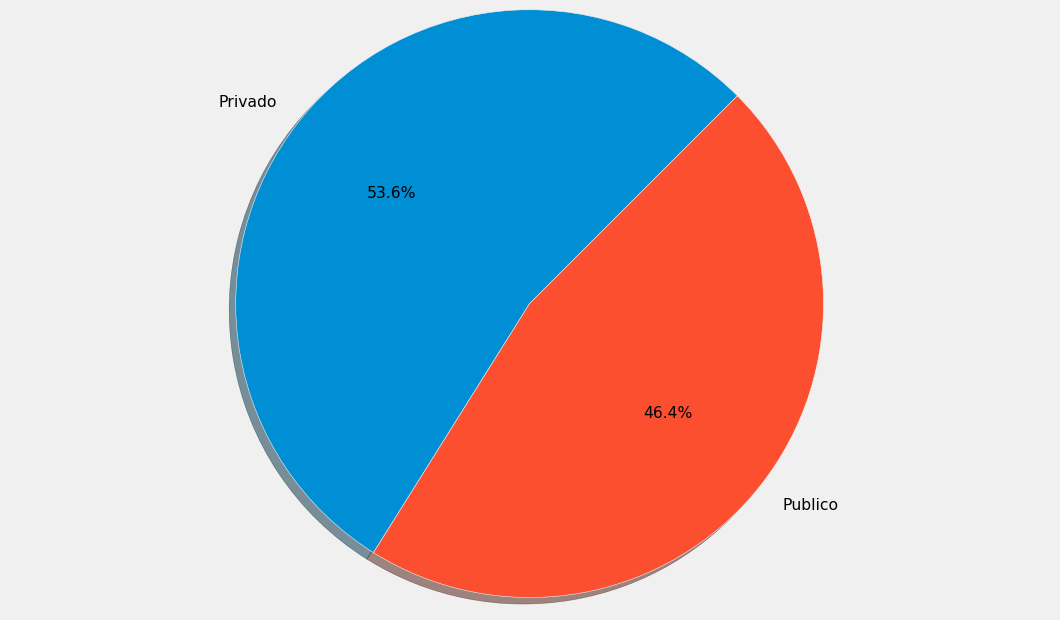

In [27]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
residenciasporSector  = data.groupby(['Sector']).count()[['Total']].sort_values(['Total'], ascending=False)

labels = residenciasporSector.index
values = residenciasporSector.values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Residencias por Región

In [28]:
data.groupby(['Region']).count()[['Total']].sort_values(['Total'], ascending=False)

,Total
Region,
Local,210
Foraneo,27


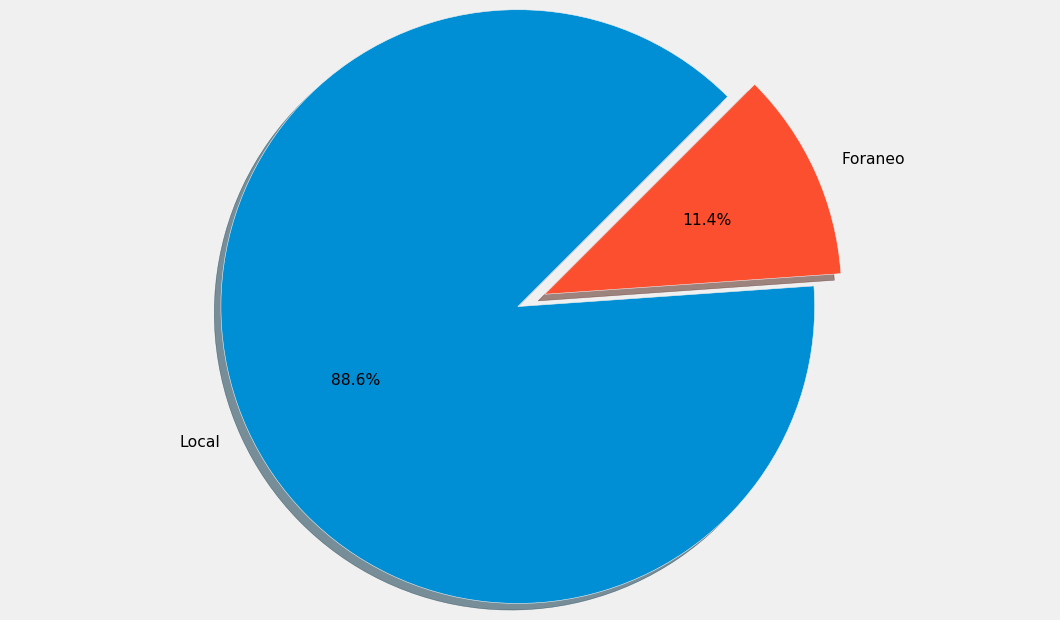

In [29]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
residenciasporregion  = data.groupby(['Region']).count()[['Total']].sort_values(['Total'], ascending=False)

labels = residenciasporregion.index
values = residenciasporregion.values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Residencias por Estado

In [30]:
# Ordenando el resultado 

data.groupby('Estado').count().sort_values(['Total'], ascending=False)[['Total']]

,Total
Estado,
Durango,211
"Coahuila, Torreón",5
"Nuevo León, Monterrey",5
Ciudad de México,3
"Jalisco, Guadalajara",2
Puebla,2
Queretaro,2
"Saltillo, Coahuila",2
Aguascalientes,1


In [31]:
data['Estado'].value_counts()

Durango                  211
Nuevo León, Monterrey      5
Coahuila, Torreón          5
Ciudad de México           3
Queretaro                  2
Saltillo, Coahuila         2
Puebla                     2
Jalisco, Guadalajara       2
Chihuahua                  1
Aguascalientes             1
Chihuahua, Cd Juarez       1
Nuevo León                 1
Jalisco, Tlaquepaque       1
Name: Estado, dtype: int64

### Graficando residencias por estado

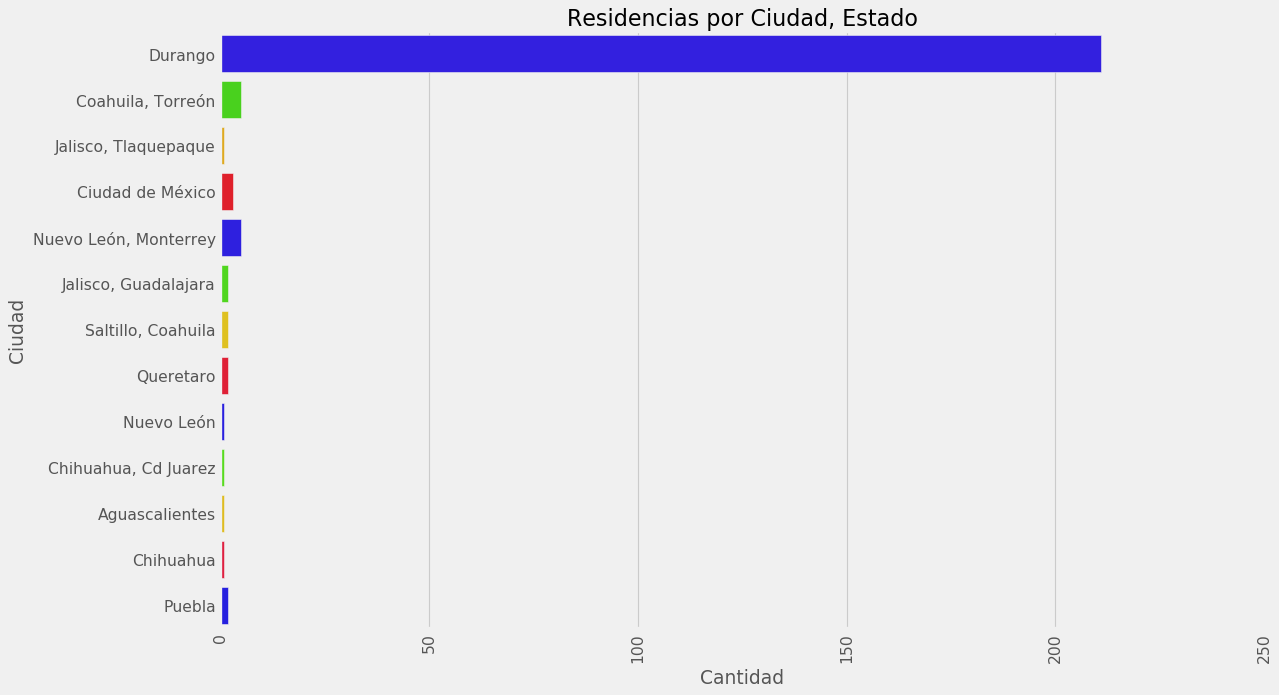

In [32]:

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(y=data['Estado'], palette = 'prism')
plt.title('Residencias por Ciudad, Estado', fontweight = 30, fontsize = 20)
plt.xlabel('Cantidad')
plt.ylabel('Ciudad')
plt.xticks(rotation = 90)
plt.show()

## Residencias por Área de conocimiento

 ### Tecnologia web se considero 105 + 4 + 2 + 2   =>     113
* 4 de Tecnologia Web, Moviles
* 2 de Tecnologia Web, bases de datos
* 2 Tecnologia Web, Moviles, Sistema de escritorio, Arduinos
* 2 Tecnologia Web, Redes
* 2 Tecnologia Web, Moviles, Usabilidad

### Para sistemas de escritorio  27 + 2    =>  29
* 2 Tecnologia Web, Moviles, Sistema de escritorio

### Para moviles   24 + 2 + 2   =>   28
* 2 Tecnologia Web, Moviles, Sistema de escritorio, Arduinos
* 2 Tecnologia Web, Moviles, Usabilidad

###  Para redes   23 + 2   =>     25
* 2 Tecnologia Web, Redes


In [33]:
data.groupby('AreaAplicacionConocimiento').count().sort_values(['Total'], ascending=False)[['Total']]

,Total
AreaAplicacionConocimiento,
Tecnologia Web,105
Sistema de escritorio,27
Moviles,24
Redes,23
Usabilidad / UX,7
No aplica,6
Multimedia,5
Documentacion de sistemas,5
"Tecnologia Web, Moviles",4


In [34]:
#  Como la informacion de las AreaAplicacionConocimiento esta en una columna y vienen 
#  multiples valores separados por coma, se tiene que crear un nuevo dataframe y hacer :
# "expandir" la columna en múltiples filas mediante unstack() y 
# Despues borrra los espacios en blanco entre los valores de la lista
# (2) Aplicar un groupby() clásico para contar ahora sí las filas.


df_areas = pd.DataFrame(data["AreaAplicacionConocimiento"].str.split(',', expand=True).unstack(), columns=["AreaAplicacionConocimiento"])
df_areas = pd.DataFrame(df_areas['AreaAplicacionConocimiento'].str.strip())
df_areas['Total'] = 1

df_areas.head(10)

AreaAplicacionConocimiento  Total
0 0      Sistema de escritorio      1
  1      Sistema de escritorio      1
  2                    Moviles      1
  3      Sistema de escritorio      1
  4             Tecnologia Web      1
  5             Tecnologia Web      1
  6                    Moviles      1
  7                    Moviles      1
  8                  No aplica      1
  9      Sistema de escritorio      1

In [35]:
# Agrupamos la informacion y contamos 
df_areas.groupby('AreaAplicacionConocimiento').count()[['Total']].sort_values(['Total'], ascending=False)[['Total']]

,Total
AreaAplicacionConocimiento,
Tecnologia Web,117
Moviles,30
Sistema de escritorio,29
Redes,25
Usabilidad / UX,9
No aplica,6
Documentacion de sistemas,5
Multimedia,5
Bases de datos,4


### Número de alumnos asignados por proyecto

In [36]:
data.groupby('AlumnosAsignados').count().sort_values(['Total'], ascending=False)[['Total']]

,Total
AlumnosAsignados,
1,123
2,100
3,14


### Lenguajes de Programación mas utilizados

## Conteo manual para verificar coincidencias con la solucion planteada
Para PHP  28 + 25 + 5 + 3 +3  +1 +1 +1 +1   =>     68

Para Javascript   25  + 14 +3 +3+ 2+ 2  +1 +1 +1 +1 +1 +1 =>     55

Para Java  36 + 5 + 4  +3 +1 +1 +1 +1 +1 +1  =>  54

Para c#     12 + 4 + 2  + 2 + 1 + 1 +1 +1  =>   25

Typescript  3 +3 +1  + 1 +1   =>  9

Python   1 +1 + 1   =>  3

Ruby  2
swift, Objective-c, Ruby, visual basic c++   2veces, kotlyn

In [37]:
# los valores vienen en ocasiones separados por coma
# mas adelante se plantea la solucion
data.groupby('LenguajesProgramacion').count().sort_values(['Total'], ascending=False)[['Total']]

,Total
LenguajesProgramacion,
No aplica,73
Java,40
PHP,28
"PHP, Javascript",25
C#,18
Javascript,14
"PHP, Java",5
"PHP, Java, Javascript",4
"Javascript, Typescript",4


In [38]:
# otra forma de sacar la info
data['LenguajesProgramacion'].value_counts().head()

     

No aplica          73
Java               40
PHP                28
PHP, Javascript    25
C#                 18
Name: LenguajesProgramacion, dtype: int64

In [39]:
#  Como la informacion de los lenguajes esta en una columna y vienen multiples
# valores separados por coma, se tiene que crear un nuevo dataframe y hacer :
# "expandir" la columna en múltiples filas mediante unstack() y 
# Despues borrra los espacios en blanco entre los valores de la lista
# (2) Aplicar un groupby() clásico para contar ahora sí las filas.


df_lenguajes = pd.DataFrame(data["LenguajesProgramacion"].str.split(',', expand=True).unstack(), columns=["LenguajesProgramacion"])
df_lenguajes = pd.DataFrame(df_lenguajes['LenguajesProgramacion'].str.strip())
df_lenguajes['Total'] = 1

df_lenguajes.head()

LenguajesProgramacion  Total
0 0                  Java      1
  1                  Java      1
  2             No aplica      1
  3                  Java      1
  4             No aplica      1

In [40]:
# Agrupamos la informacion y contamos 
df_lenguajes.groupby('LenguajesProgramacion').count()[['Total']].sort_values(['Total'], 
                                            ascending=False)[['Total']]

,Total
LenguajesProgramacion,
No aplica,73
PHP,68
Javascript,55
Java,54
C#,27
Typescript,9
Python,4
Ruby,2
C++,2


### Bases de Datos mas utilizados

In [41]:
data.groupby('BasesDatos').count().sort_values(['Total'], ascending=False)[['Total']]

,Total
BasesDatos,
No aplica,99
MySQL,79
SQL Server,21
Firebase,12
Sybase,7
Oracle,4
PostgreSQL,4
SQLite,4
"MongoDB, SQLite",3


In [42]:
#  Como la informacion de los BASES DE DATOS esta en una columna y vienen multiples
# valores separados por coma, se tiene que crear un nuevo dataframe y hacer :
# "expandir" la columna en múltiples filas mediante unstack() y 
# Despues borrra los espacios en blanco entre los valores de la lista
# (2) Aplicar un groupby() clásico para contar ahora sí las filas.


df_bd = pd.DataFrame(data["BasesDatos"].str.split(',', expand=True).unstack(), columns=["BasesDatos"])
df_bd = pd.DataFrame(df_bd['BasesDatos'].str.strip())
df_bd['Total'] = 1

df_bd.head(10)

BasesDatos  Total
0 0      MySQL      1
  1      MySQL      1
  2  No aplica      1
  3      MySQL      1
  4  No aplica      1
  5  No aplica      1
  6   Firebase      1
  7   Firebase      1
  8  No aplica      1
  9      MySQL      1

In [43]:
# Agrupamos la informacion y contamos 
df_bd.groupby('BasesDatos').count()[['Total']].sort_values(['Total'], ascending=False)[['Total']]

,Total
BasesDatos,
No aplica,99
MySQL,81
SQL Server,21
Firebase,12
SQLite,7
Sybase,7
Oracle,5
MongoDB,4
PostgreSQL,4


### Entornos de Programación mas utilizados   IDEs

In [44]:
data.groupby('EntornoDesarrollo').count().sort_values(['Total'], ascending=False)[['Total']]

,Total
EntornoDesarrollo,
No Aplica,91
Sublime,54
Visual Studio,23
Netbeans,19
Android Studio,13
Visual Code,10
"Sublime, Netbeans, Visual Code",4
Dreamweaver,4
Atom,4


In [45]:
#  Como la informacion de los Entornos de programación esta en una columna y vienen multiples
# valores separados por coma, se tiene que crear un nuevo dataframe y hacer :
# "expandir" la columna en múltiples filas mediante unstack() y 
# Despues borrra los espacios en blanco entre los valores de la lista
# (2) Aplicar un groupby() clásico para contar ahora sí las filas.


df_ides = pd.DataFrame(data["EntornoDesarrollo"].str.split(',', expand=True).unstack(), columns=["EntornoDesarrollo"])
df_ides = pd.DataFrame(df_ides['EntornoDesarrollo'].str.strip())
df_ides['Total'] = 1

df_ides.head(10)

EntornoDesarrollo  Total
0 0          Netbeans      1
  1          Netbeans      1
  2         No Aplica      1
  3          Netbeans      1
  4         No Aplica      1
  5         No Aplica      1
  6    Android Studio      1
  7    Android Studio      1
  8         No Aplica      1
  9          Netbeans      1

In [46]:
# Agrupamos la informacion y contamos 
df_ides.groupby('EntornoDesarrollo').count()[['Total']].sort_values(['Total'], ascending=False)[['Total']]

,Total
EntornoDesarrollo,
No Aplica,91
Sublime,65
Netbeans,29
Visual Studio,23
Visual Code,17
Android Studio,15
Atom,4
Dreamweaver,4
Eclipse,3


## Frameworks de desarrollo  mas utilizados

In [47]:
data.groupby('FrameworksDesarrollo').count().sort_values(['Total'], ascending=False)[['Total']]

,Total
FrameworksDesarrollo,
No aplica,147
Ionic,7
Angular JS,6
Wordpress,6
"Angular JS, Ionic",4
Bootstrap,4
"Bootstrap, JQuery",3
Unity,3
"Angular JS, JQuery, Bootstrap",3


In [48]:
#  Como la informacion de los Frameworks esta en una columna y vienen multiples
# valores separados por coma, se tiene que crear un nuevo dataframe y hacer :
# "expandir" la columna en múltiples filas mediante unstack() y 
# Despues borrra los espacios en blanco entre los valores de la lista
# (2) Aplicar un groupby() clásico para contar ahora sí las filas.


df_fd = pd.DataFrame(data["FrameworksDesarrollo"].str.split(',', expand=True).unstack(), columns=["FrameworksDesarrollo"])
df_fd = pd.DataFrame(df_fd['FrameworksDesarrollo'].str.strip())
df_fd['Total'] = 1

df_fd.head(10)

FrameworksDesarrollo  Total
0 0            No aplica      1
  1            No aplica      1
  2                Ionic      1
  3            No aplica      1
  4            Wordpress      1
  5            Wordpress      1
  6                Ionic      1
  7                Ionic      1
  8            No aplica      1
  9            No aplica      1

In [49]:
# Agrupamos la informacion y contamos 
df_fd.groupby('FrameworksDesarrollo').count()[['Total']].sort_values(['Total'], 
                                     ascending=False)[['Total']]



,Total
FrameworksDesarrollo,
No aplica,150
Angular JS,24
Ionic,17
Node JS,15
Bootstrap,12
JQuery,9
,6
Wordpress,6
Unity,5


## Empresa / Institucion mas frecuentes

In [50]:
data.groupby('EmpresaInstitucion').count().sort_values(['Total'], ascending=False)[['Total']]

,Total
EmpresaInstitucion,
ITD Instituto Tecnológico de Durango,43
Ventus Technology,8
EISEI,8
SEED Secretaria de Educación del Estado de Durango,6
CFE Comisión Federal de Electricidad,5
TELMEX Teléfonos de México SA de CV,5
SIITECS Soluciones Integrales e InnovaciónTecnológica Sustentable SA de CV,4
4+1 Creative SA de CV,4
UJED Universidad Juárez del Estado de Durango,3


In [ ]:
data.groupby('NombreResidente').count().sort_values(['Total'], ascending=False)[['Total']]

In [ ]:
data.groupby('NombreProyecto').count().sort_values(['Total'], ascending=False)[['Total']]

## Nube de palabras
* Definir una funcion para llamarla cada vez que se necesite
* Definir palabras que se omiten
+ Se definen parametros como numero maximo de palabras, tamaño máximo de la fuente, contorno de la imagen a mostrar 


In [ ]:
# Obtener unicamente los objetivos para nube de palabras
objetivos = data.iloc[ : , 7 ]

objetivos.head()


In [ ]:
def plot_wordcloud(text, mask=None, max_words=40, max_font_size=70, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'de', 'para', 'un', 'las', 'en', 'con', 'el', 'la', 'una','que', 'del', 'los'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    contour_width=1, 
                    contour_color='firebrick',
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
d = 'C://temp/'




### Nube de palabras con imagen de un birrete

In [ ]:
comments_text = str(objetivos)
##comments_mask = np.array(Image.open(d + 'comment.png'))


comments_mask = np.array(Image.open(d + 'birrete.png'))
plot_wordcloud(comments_text, comments_mask, max_words=300, max_font_size=150, 
               title = 'Palabras mas usadas en Objetivos', title_size=50, )

In [ ]:
#  Como la informacion de los Frameworks esta en una columna y vienen multiples
# valores separados por coma, se tiene que crear un nuevo dataframe y hacer :
# "expandir" la columna en múltiples filas mediante unstack() y 
# Despues borrra los espacios en blanco entre los valores de la lista
# (2) Aplicar un groupby() clásico para contar ahora sí las filas.


df_obj = pd.DataFrame(data["Objetivo"].str.split(' ', expand=True).unstack(), columns=["Objetivo"])
df_obj = pd.DataFrame(df_obj['Objetivo'].str.strip())
df_obj['Total'] = 1

df_obj.head(10)

In [ ]:
# Agrupamos la informacion y contamos 
df_obj.groupby('Objetivo').count()[['Total']].sort_values(['Total'], ascending=False)[['Total']]

### Nube de palabras con imagen de una niña trabajando en una laptop

In [ ]:
comments_text = str(objetivos)
##comments_mask = np.array(Image.open(d + 'comment.png'))
comments_mask = np.array(Image.open(d + 'ninacompu.png'))
plot_wordcloud(comments_text, comments_mask, max_words=300, max_font_size=200, 
               title = 'Palabras mas usadas en Objetivos', title_size=50, )

In [ ]:
comments_text = str(objetivos)
##comments_mask = np.array(Image.open(d + 'comment.png'))
comments_mask = np.array(Image.open(d + 'ninacompu.png'))
plot_wordcloud(comments_text, comments_mask, max_words=300, max_font_size=200, 
               title = 'Palabras mas usadas en Objetivos', title_size=50, )

### Nube de palabras sin usar función

In [ ]:
objetivos = data.iloc[ : , 8 ]
birrete_mask = np.array(Image.open("C://temp//birrete.png"))
stopwords = {'de', 'para', 'un', 'las', 'en', 'con', 'el', 'la', 'una','que', 'del', 'los'}
text = str(objetivos)

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=300, mask=birrete_mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("C://temp//cloud_objetivos.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()